In [1]:
#Import Libraries and Set Style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load and Prepare Data
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                 columns=iris['feature_names'] + ['target'])

# Convert target to int type to avoid visualization issues
df['target'] = df['target'].astype(int)

# Create a mapping for target names
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['target'].map(target_names)

# Display the first few rows and basic information
print("First 5 rows of our dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of our dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width 

In [3]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

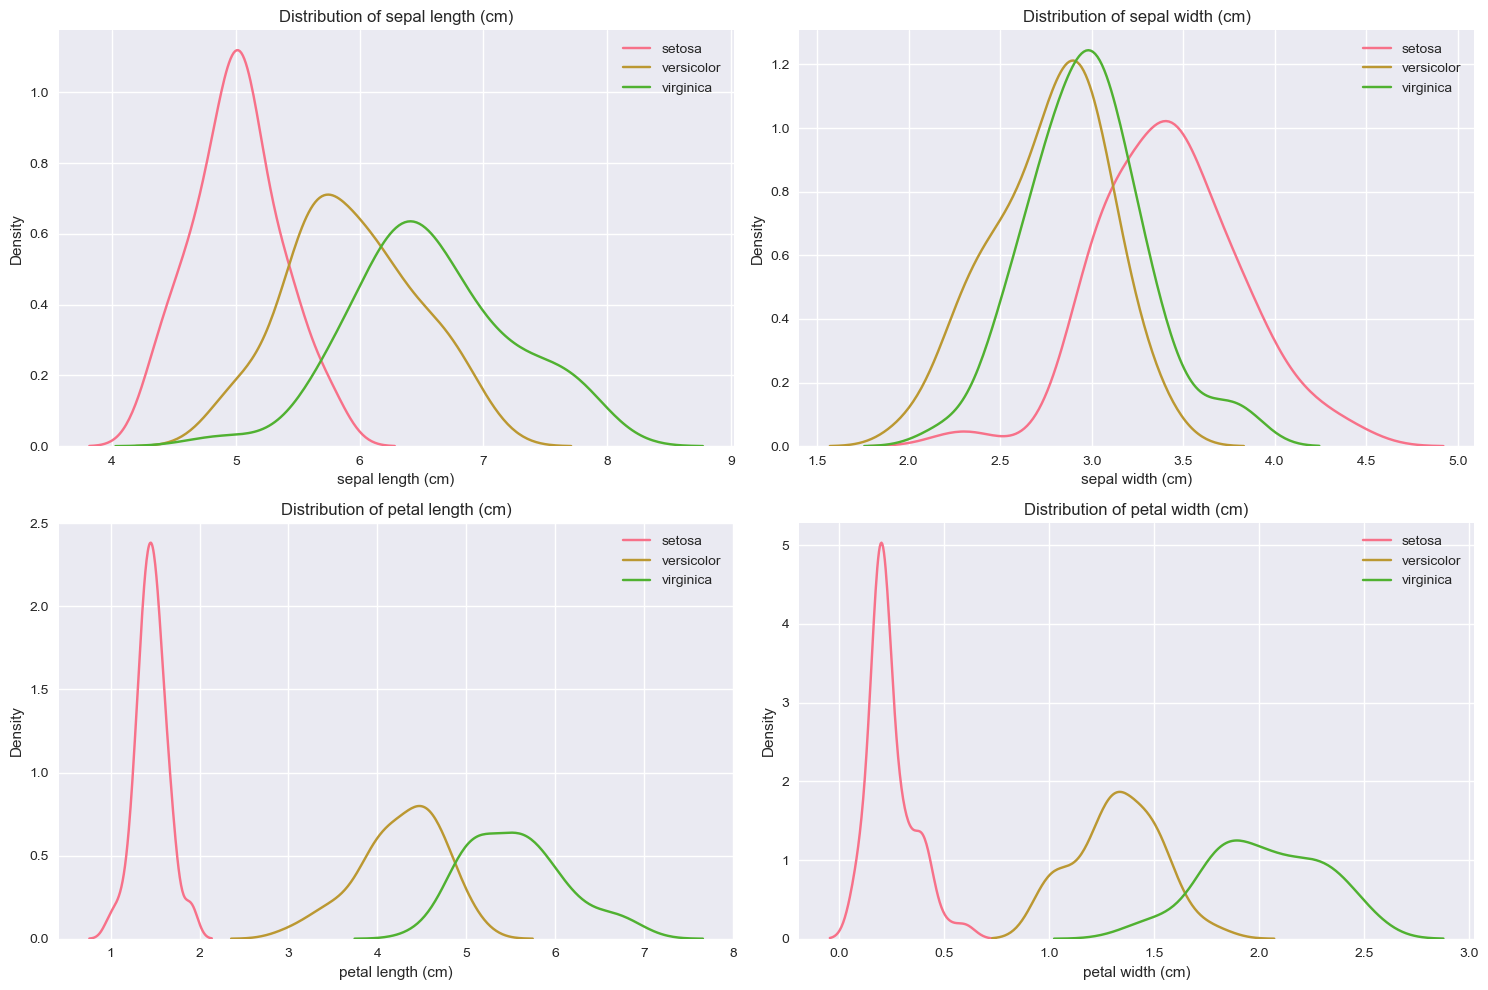

In [4]:
#Enhanced Distribution Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i+1)
    for species in df['target'].unique():
        subset = df[df['target'] == species]
        sns.kdeplot(data=subset, x=feature, label=target_names[species])
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

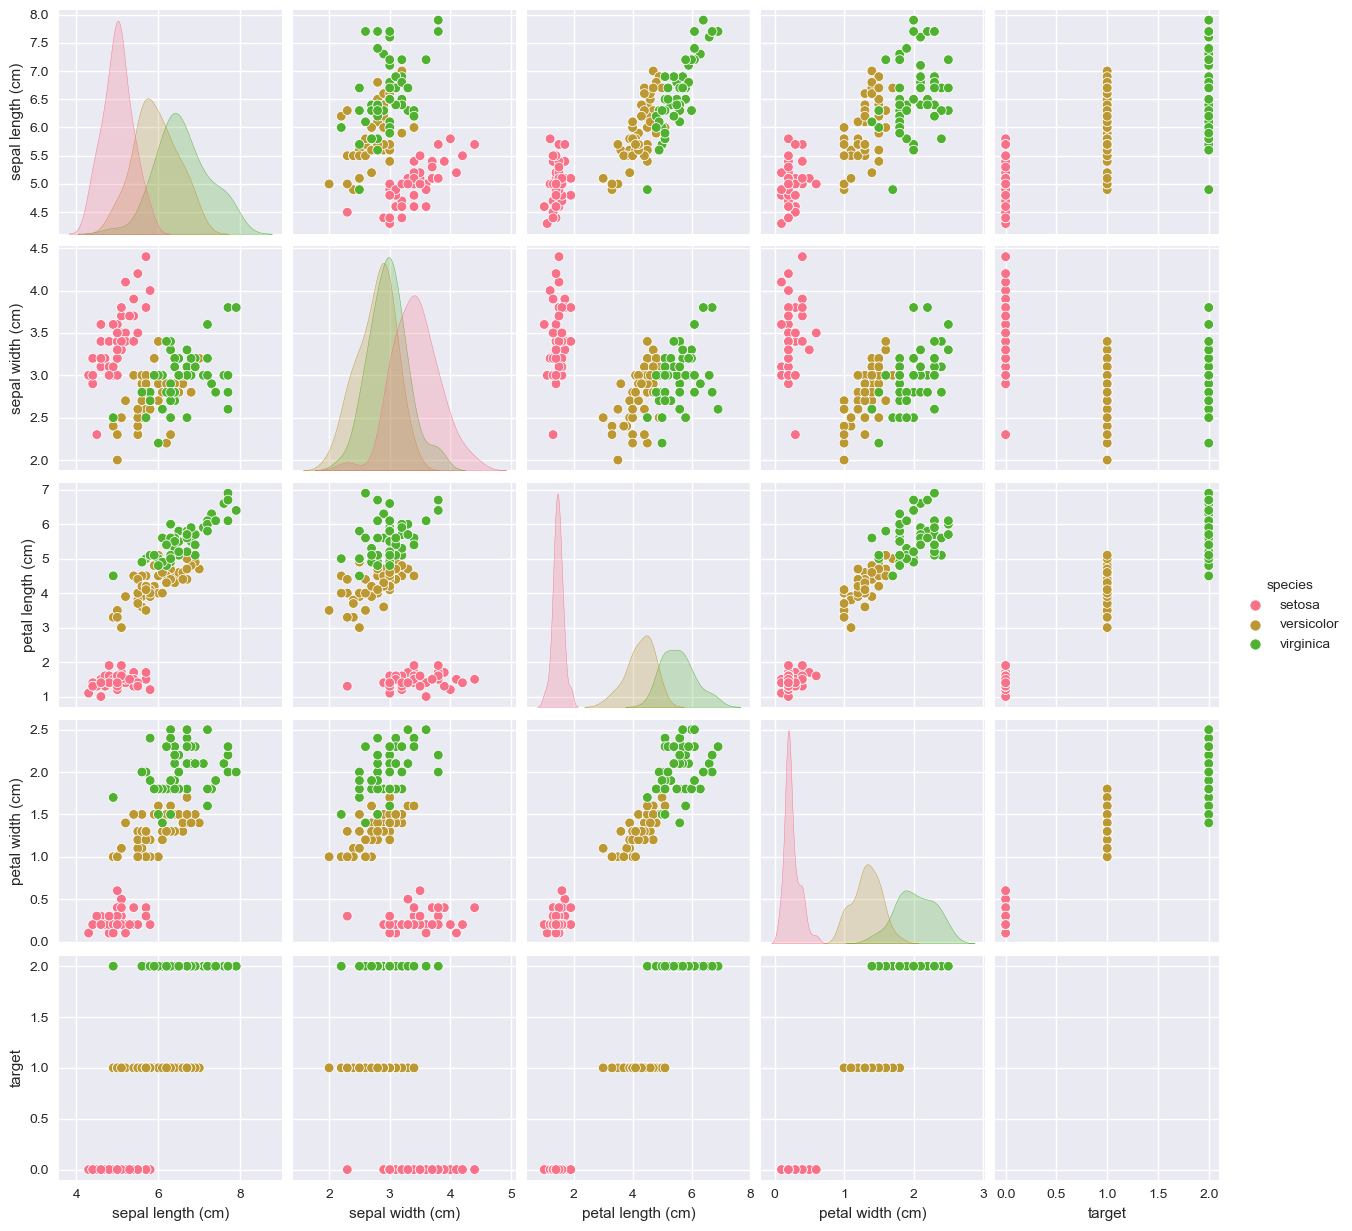

In [5]:
#Safe Pairplot Implementation
try:
    plt.figure(figsize=(10, 8))
    sns.pairplot(df, hue='species', diag_kind='kde')
    plt.show()
except Exception as e:
    print(f"Error in pairplot: {e}")

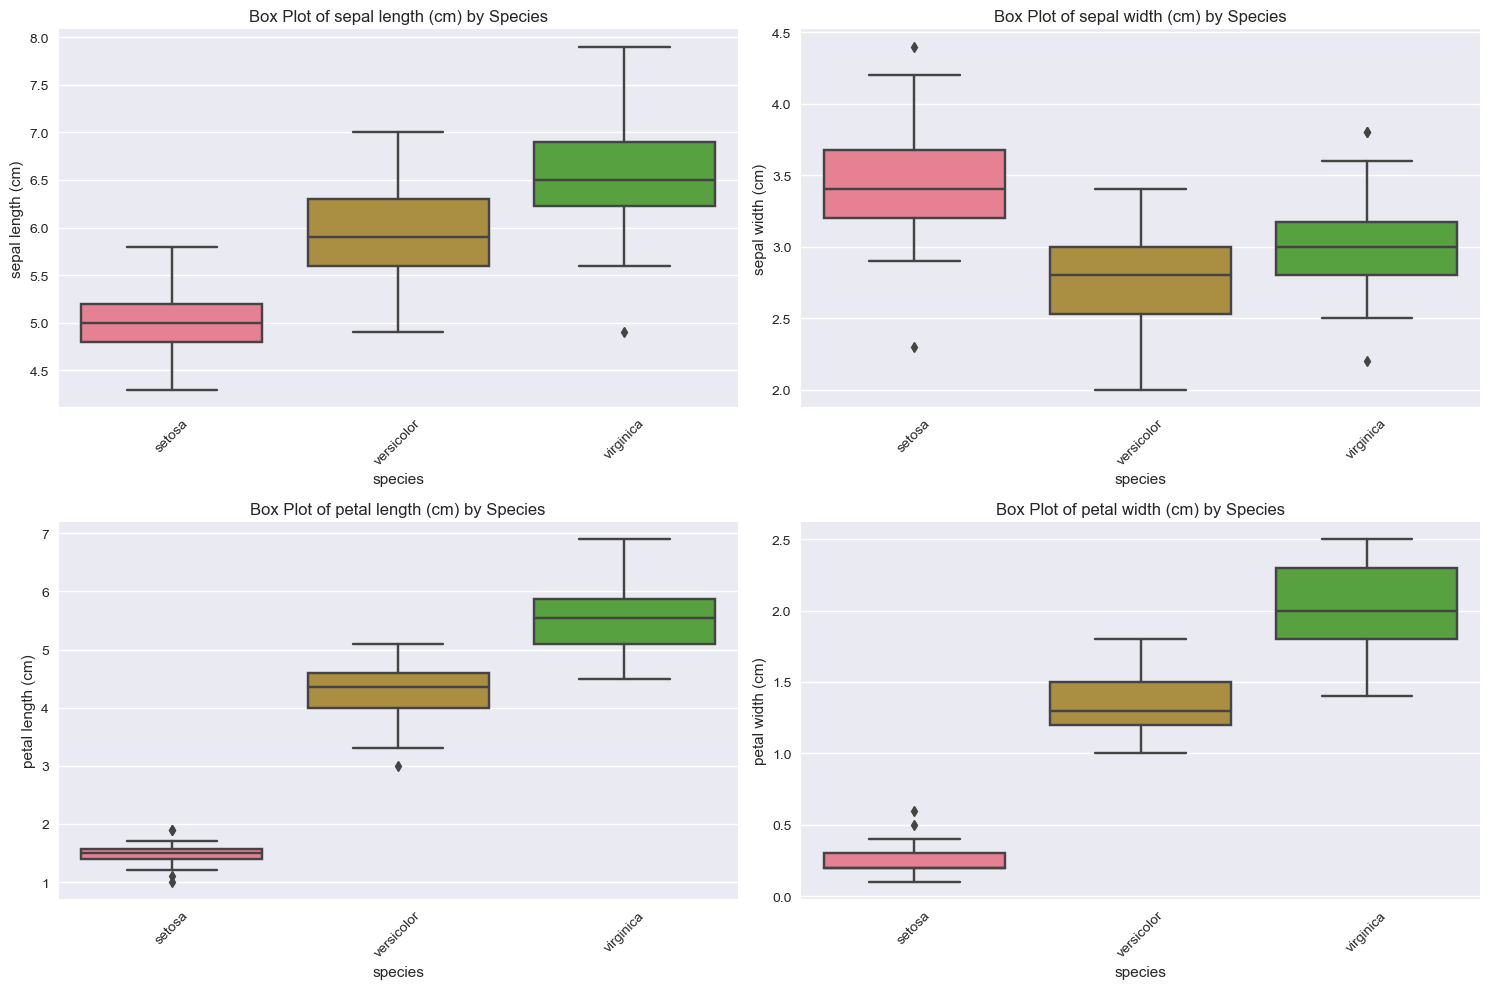

In [6]:
#Box Plot Analysis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='species', y=feature)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of {feature} by Species')
plt.tight_layout()
plt.show()

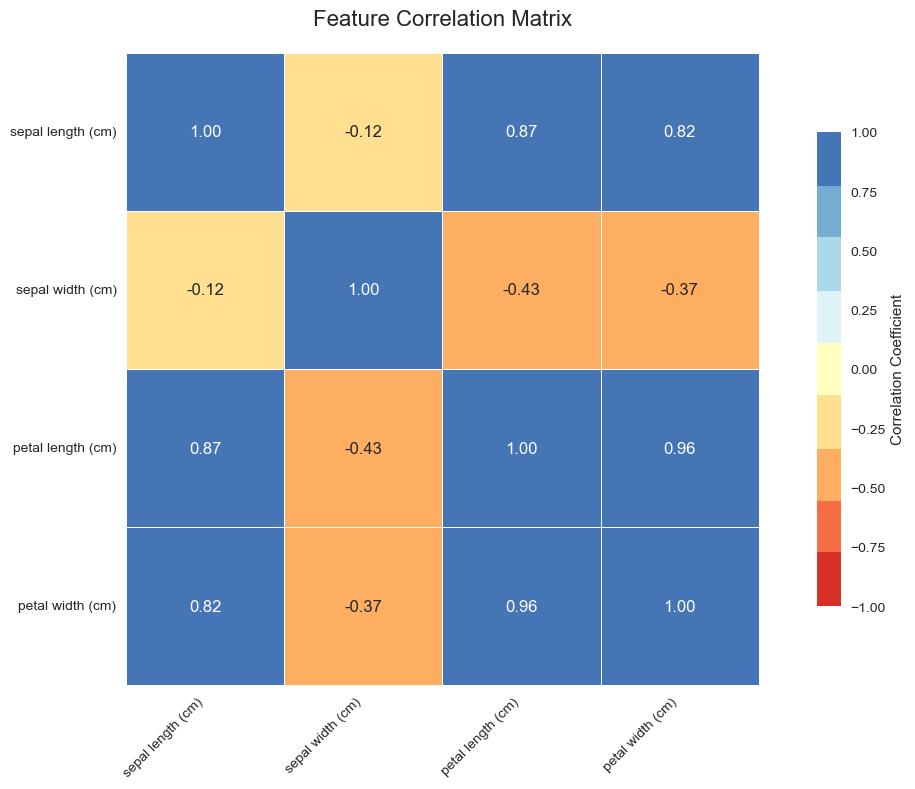


Correlation Values:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.118              0.872   
sepal width (cm)              -0.118             1.000             -0.428   
petal length (cm)              0.872            -0.428              1.000   
petal width (cm)               0.818            -0.366              0.963   

                   petal width (cm)  
sepal length (cm)             0.818  
sepal width (cm)             -0.366  
petal length (cm)             0.963  
petal width (cm)              1.000  

Strong Correlations (|r| > 0.5):
petal length (cm) vs sepal length (cm): 0.872
petal width (cm) vs sepal length (cm): 0.818
petal width (cm) vs petal length (cm): 0.963


In [7]:
#Enhanced Correlation Analysis
correlation = df.drop(['target', 'species'], axis=1).corr()

plt.figure(figsize=(12, 8))
colors = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#ffffbf',
          '#e0f3f8', '#abd9e9', '#74add1', '#4575b4']
cmap = sns.color_palette(colors, as_cmap=True)

sns.heatmap(correlation, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0, 
            square=True, fmt='.2f', annot_kws={'size': 12}, linewidths=0.5, 
            cbar_kws={"shrink": .75, "label": "Correlation Coefficient"})

plt.title('Feature Correlation Matrix', pad=20, size=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelation Values:")
print(correlation.round(3))

print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.5:
            print(f"{correlation.index[i]} vs {correlation.columns[j]}: {correlation.iloc[i, j]:.3f}")

In [8]:
#Data Preprocessing with Validation
X = df.drop(['target', 'species'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features with error handling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#Enhanced Model Training
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

models = {'Random Forest': rf_model, 'Support Vector Machine': svm_model, 'K-Nearest Neighbors': knn_model}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

In [10]:
#Improved Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nResults for {model_name}:")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Results for Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



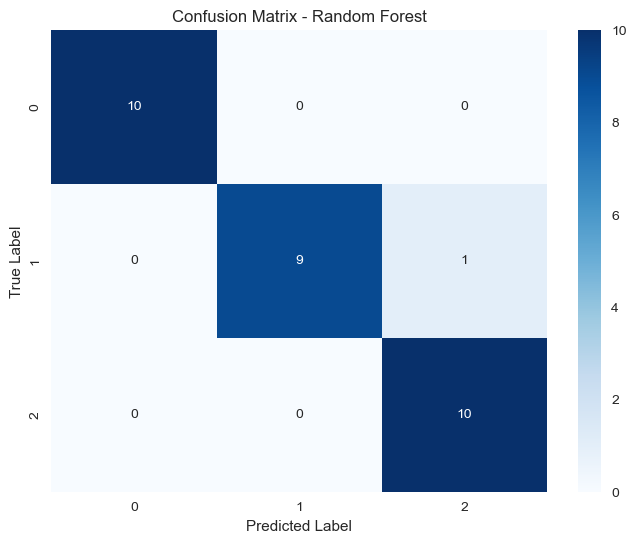


Results for Support Vector Machine:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



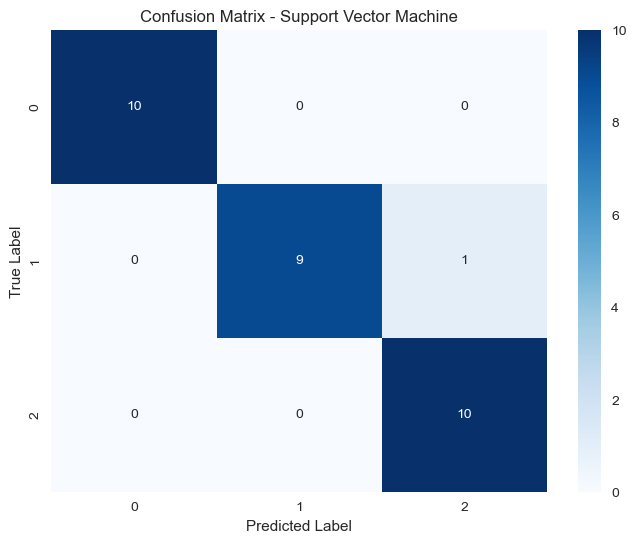


Results for K-Nearest Neighbors:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



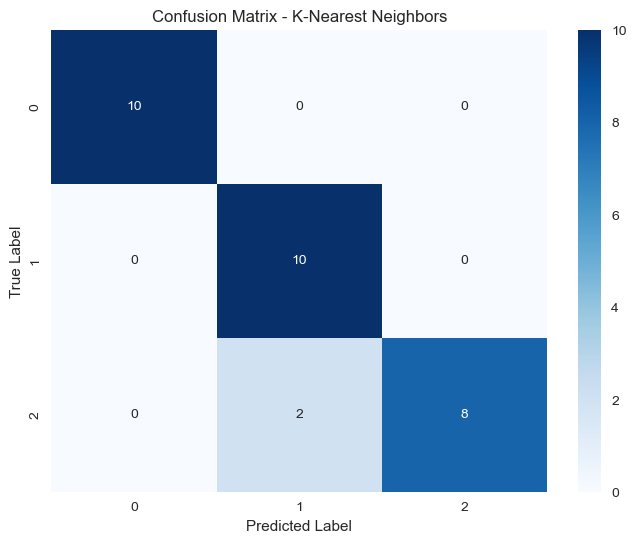

In [11]:
#Evaluate All Models
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    evaluate_model(y_test, predictions, name)

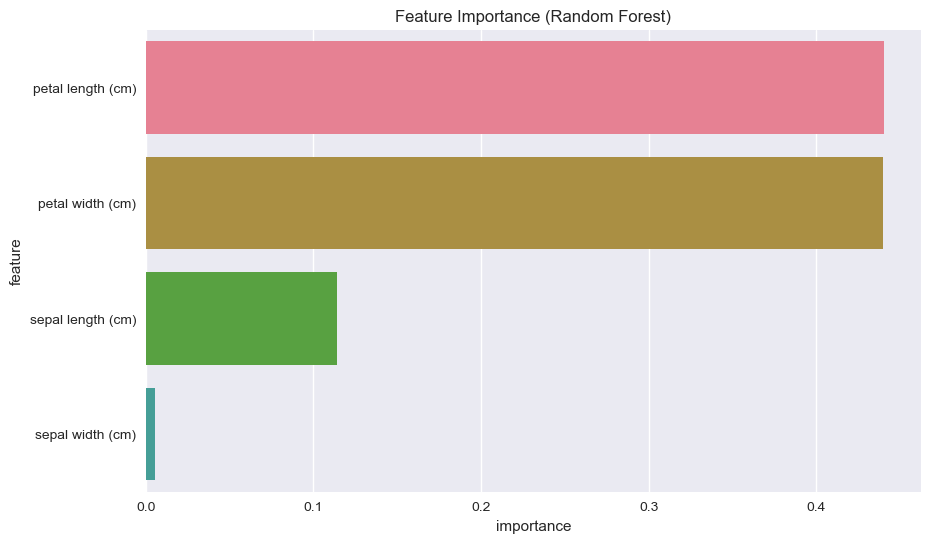

In [12]:
#Enhanced Feature Importance Analysis
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({'feature': iris['feature_names'], 'importance': rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance (Random Forest)')
    plt.show()

In [13]:
#Robust Cross-validation Analysis
print("\nCross-validation scores (5-fold):")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"\n{name}: Mean CV Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Cross-validation scores (5-fold):

Random Forest: Mean CV Score: 0.958 (+/- 0.000)

Support Vector Machine: Mean CV Score: 0.967 (+/- 0.062)

K-Nearest Neighbors: Mean CV Score: 0.967 (+/- 0.062)


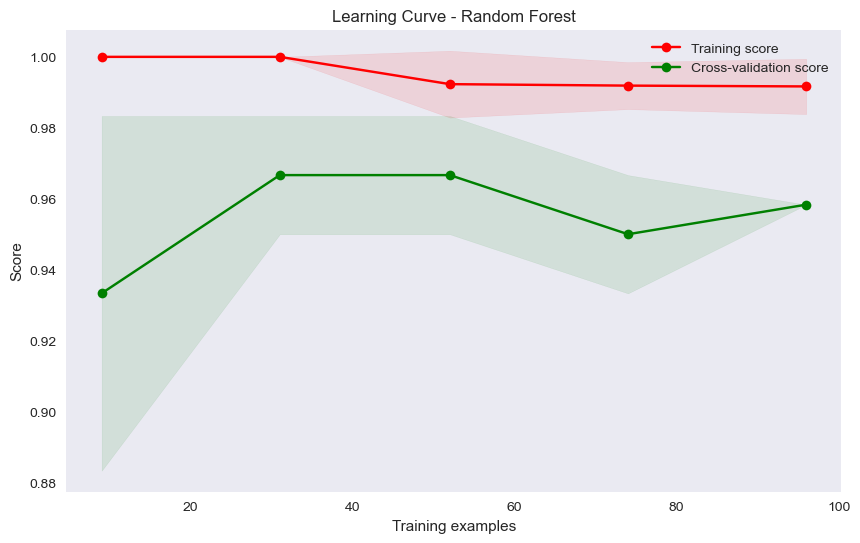

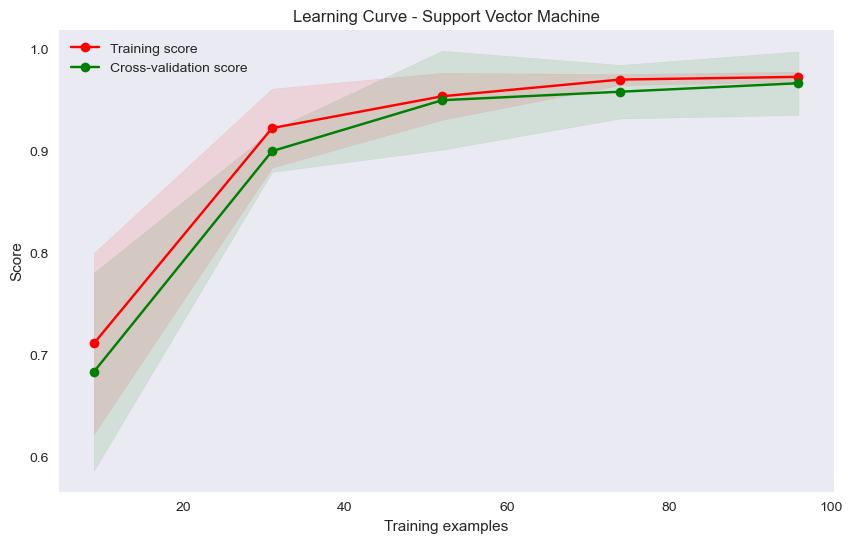

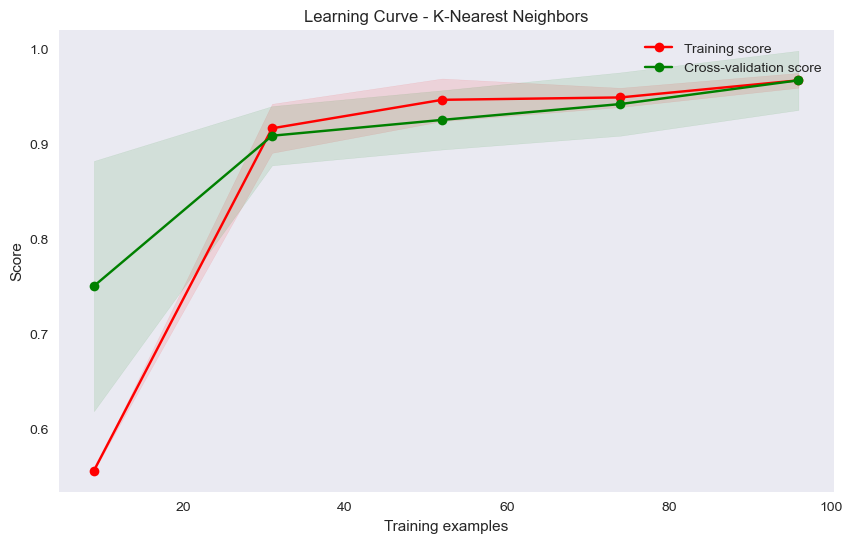

In [14]:
#Learning Curves Analysis
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                       train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curves for each model
for name, model in models.items():
    try:
        plot_learning_curve(model, f'Learning Curve - {name}',
                          X_train_scaled, y_train)
        plt.show()
    except Exception as e:
        print(f"Error plotting learning curve for {name}: {e}")